In [4]:
import numpy as np
from scipy.integrate import simps, trapz

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 2,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os.path as path

In [6]:
U = np.array([0.001*i for i in range(500, 5001)])
U1 = np.zeros(161, dtype = 'float64')
U2 = np.zeros(153, dtype = 'float64')
spectral1 = np.zeros((len(U1), 2638), dtype = 'float64')
spectral2 = np.zeros((len(U2), 2638), dtype = 'float64')
n = 0
for i, u in enumerate(U):
    if path.isfile(f'./NRG_metal_insulator/Bethe-{u:.3f}.dat')==False: continue
    U1[n] = u
    n += 1 
n = 0
for i, u in enumerate(U):
    if path.isfile(f'./NRG_insulator_metal/Bethe-{u:.3f}.dat')==False: continue
    U2[n] = u
    n += 1
    
for i, u in enumerate(U1):
    if path.isfile(f'./NRG_metal_insulator/Bethe-{u:.3f}.dat')==False: continue
    w, A = np.loadtxt(f'./NRG_metal_insulator/Bethe-{u:.3f}.dat', unpack=True, dtype = 'float64')
    spectral1[i] = A
for i, u in enumerate(U2):
    if path.isfile(f'./NRG_insulator_metal/Bethe-{u:.3f}.dat')==False: continue
    w, A = np.loadtxt(f'./NRG_insulator_metal/Bethe-{u:.3f}.dat', unpack=True, dtype = 'float64')
    spectral2[i] = A

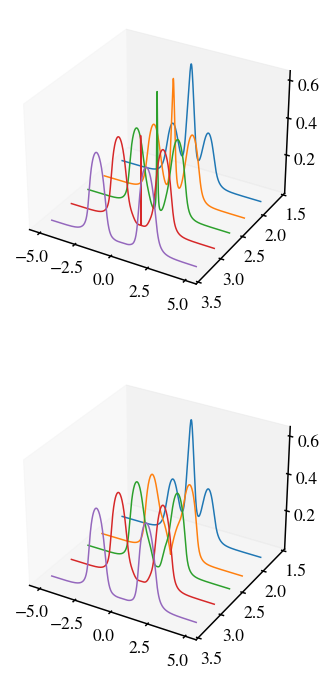

In [80]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(211, projection='3d')
ax1.grid(False)
ax1.set_ylim(3.5, 1.5)
for i,u in enumerate(U1):
    if i not in [40, 80, 105, 140, 153]: continue
    ax1.plot3D(w, np.tile(U1[i], len(w)), spectral1[i])
    
ax2 = fig.add_subplot(212, projection='3d')
ax2.grid(False)
ax2.set_ylim(3.5, 1.5)
for i,u in enumerate(U2):
    if i not in [8, 25, 70, 80, 120]: continue
    ax2.plot3D(w, np.tile(U2[i], len(w)), spectral2[i])

In [54]:
U2[9]

1.9000000000000001

In [61]:
for i,u in enumerate(U1):
    if i not in [40, 80, 105, 140, 153]: continue
    print(u)

1.8
2.2
2.5500000000000003
2.9
3.3000000000000003


In [72]:
for i,u in enumerate(U2):
    if i not in [8, 25, 70, 80, 120]: continue
    print(u)

1.8
2.25
2.5500000000000003
2.9
3.3000000000000003
